In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [17]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/EDA/data.csv')

In [18]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [20]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [21]:
data.shape

(11914, 16)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [25]:
res = data.drop(['Engine Fuel Type', 'Popularity', 'Number of Doors', 'Market Category', 'Vehicle Style'], axis=1)

In [26]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Vehicle Size       11914 non-null  object 
 8   highway MPG        11914 non-null  int64  
 9   city mpg           11914 non-null  int64  
 10  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1024.0+ KB


In [27]:
res = res.rename(columns={'Make' : 'Brand', 'Engine Cylinders' : 'Cylinders', 'Engine HP' : 'HP', 'Transmission Type' : 'Transmission', 'highway mpg' : 'MGP-H','city mpg' : 'MGP-C'})

In [28]:
res.shape

(11914, 11)

In [29]:
data_dups = res[res.duplicated()]
print(data_dups)

        Brand     Model  Year     HP  Cylinders Transmission  \
14        BMW  1 Series  2013  230.0        6.0       MANUAL   
18       Audi       100  1992  172.0        6.0       MANUAL   
20       Audi       100  1992  172.0        6.0       MANUAL   
24       Audi       100  1993  172.0        6.0       MANUAL   
25       Audi       100  1993  172.0        6.0       MANUAL   
...       ...       ...   ...    ...        ...          ...   
11481  Suzuki      X-90  1998   95.0        4.0       MANUAL   
11603   Volvo      XC60  2017  302.0        4.0    AUTOMATIC   
11604   Volvo      XC60  2017  240.0        4.0    AUTOMATIC   
11708  Suzuki       XL7  2008  252.0        6.0    AUTOMATIC   
11717  Suzuki       XL7  2008  252.0        6.0    AUTOMATIC   

           Driven_Wheels Vehicle Size  highway MPG  MGP-C   MSRP  
14      rear wheel drive      Compact           28     19  31500  
18     front wheel drive      Midsize           24     17   2000  
20     front wheel drive      

In [33]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Driven_Wheels  11914 non-null  object 
 7   Vehicle Size   11914 non-null  object 
 8   MPG-H          11914 non-null  int64  
 9   MPG-C          11914 non-null  int64  
 10  MSRP           11914 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1024.0+ KB


In [32]:
res = res.rename(columns={'highway MPG': 'MPG-H', 'MGP-C' : 'MPG-C'})

In [34]:
res = res.drop_duplicates()
res.head(5)

,Brand,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,Vehicle Size,MPG-H,MPG-C,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,34500


In [35]:
res.count()

Brand            10944
Model            10944
Year             10944
HP               10875
Cylinders        10914
Transmission     10944
Driven_Wheels    10944
Vehicle Size     10944
MPG-H            10944
MPG-C            10944
MSRP             10944
dtype: int64

In [36]:
print(res.isnull().sum())

Brand             0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
Vehicle Size      0
MPG-H             0
MPG-C             0
MSRP              0
dtype: int64


In [39]:
res = res.dropna()
res.count()

Brand            10846
Model            10846
Year             10846
HP               10846
Cylinders        10846
Transmission     10846
Driven_Wheels    10846
Vehicle Size     10846
MPG-H            10846
MPG-C            10846
MSRP             10846
dtype: int64

In [40]:
print(res.isnull().sum())

Brand            0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
Vehicle Size     0
MPG-H            0
MPG-C            0
MSRP             0
dtype: int64


In [43]:
res = res.rename(columns={'MSRP' : 'Price'})

<Axes: xlabel='Price'>

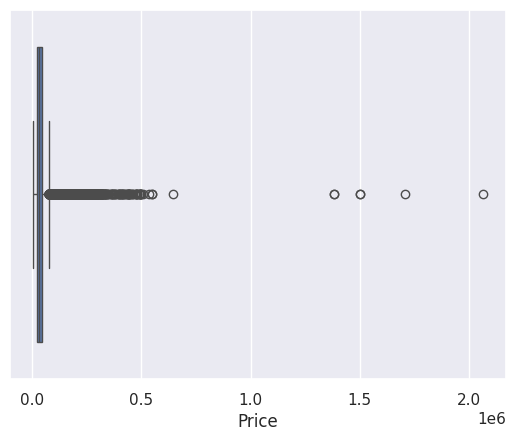

In [44]:
sns.boxplot(x=res['Price'])

<Axes: xlabel='Cylinders'>

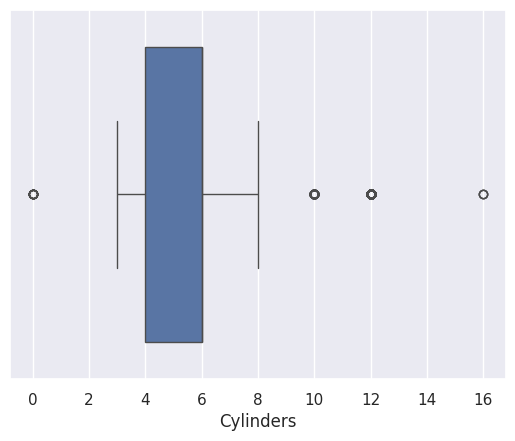

In [45]:
sns.boxplot(x=res['Cylinders'])

<Axes: xlabel='HP'>

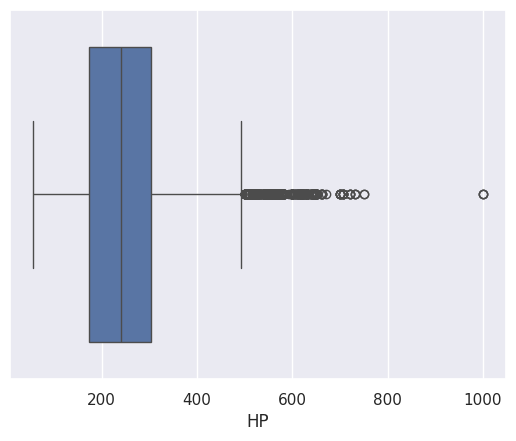

In [46]:
sns.boxplot(x=res['HP'])

In [63]:
df = res[['Year', 'Cylinders', 'HP', 'MPG-H', 'MPG-C', 'Price']]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10846 entries, 0 to 11913
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       10846 non-null  int64  
 1   Cylinders  10846 non-null  float64
 2   HP         10846 non-null  float64
 3   MPG-H      10846 non-null  int64  
 4   MPG-C      10846 non-null  int64  
 5   Price      10846 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 593.1 KB


In [65]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print(iqr)

Year             9.0
Cylinders        2.0
HP             130.0
MPG-H            8.0
MPG-C            6.0
Price        21372.5
dtype: float64


In [66]:
df = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
df.shape

(9206, 6)

In [67]:
df['Brand'] = res['Brand']

In [68]:
print(df.isnull().sum())

Year         0
Cylinders    0
HP           0
MPG-H        0
MPG-C        0
Price        0
Brand        0
dtype: int64


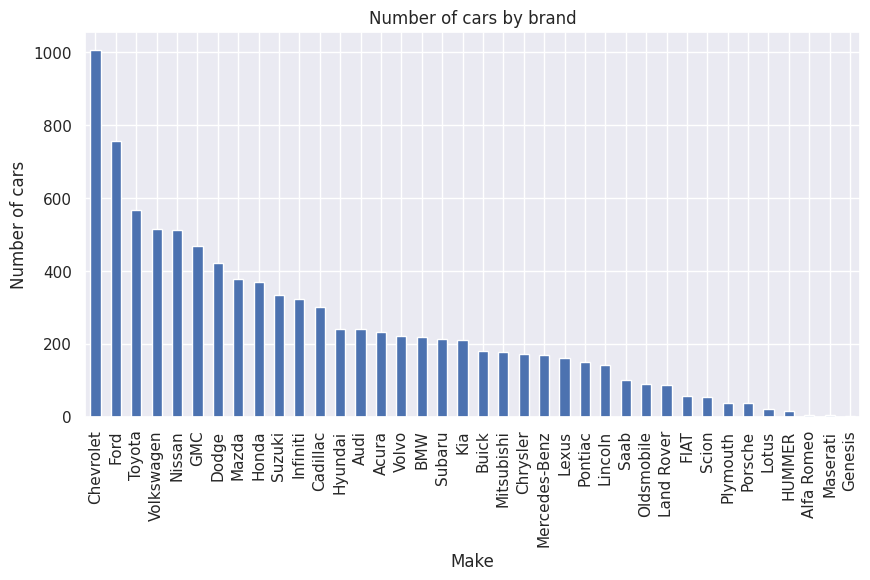

In [69]:
df.Brand.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by brand")
plt.ylabel('Number of cars')
plt.xlabel('Make');

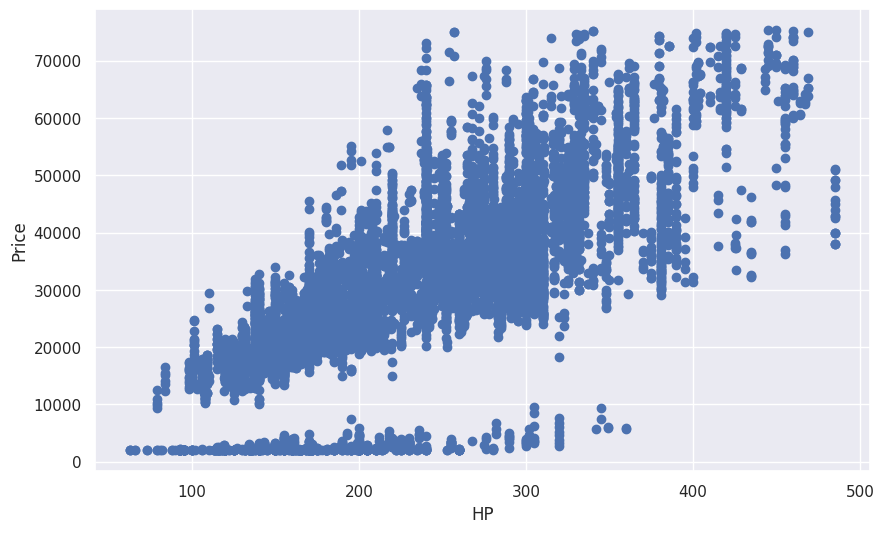

In [71]:
#Scatter Plot

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()